# Importing libraries

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# from sklearn.linear_model import LinearRegression

import statsmodels.stats.weightstats as sw
from scipy import stats



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Loading dataset in to dataframes

In [37]:
df = pd.read_csv("data/measurements.csv")
print(df.shape)
print(df.info())
# print(df.describe())
print(df.dtypes)
print(df.isnull().sum())
df.head(5)

(388, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB
None
distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun        

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


## Atributes (collumns)
- distance: (km)．
- consume: (L/100 km)．
- speed: (km/h )．
- temp_inside: (deg-C)．
- temp_outside: (deg-C) ．
- specials: "rain"，snow"，"climatization".
- gas_type: SP98,E10
- AC: 1 - climatization, 0 -no climatization
- rain: 1 - rain． / 0 - no rain
- sun: 1 - sun． / 0 - no sun

# Columns distribution.
- consume
- distance
- speedspeed
- temp_inside
- temp_outside

Text(0.5, 1.0, 'temp_outside(deg-C)')

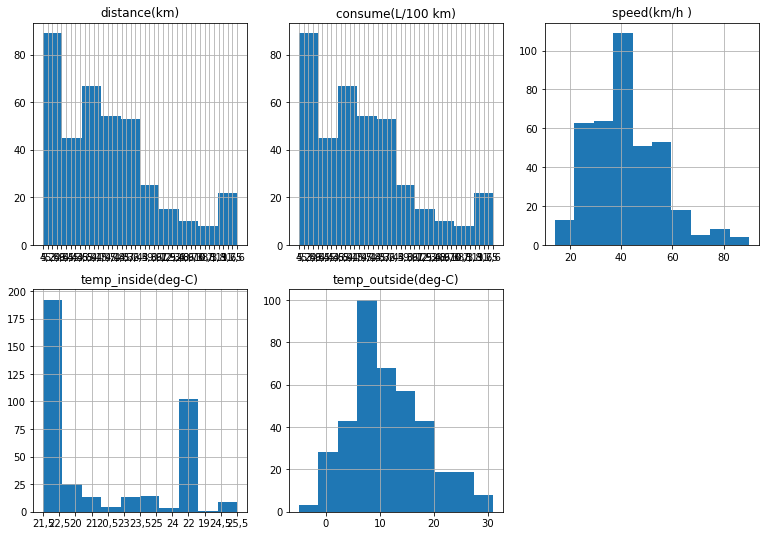

In [38]:
plt.figure(figsize=(13,9))
ax1=plt.subplot(2,3,1)
df.consume.hist(bins=10,ax=ax1)
plt.title("distance(km)")

ax2=plt.subplot(2,3,2)
df.consume.hist(bins=10,ax=ax2)
plt.title("consume(L/100 km)")

ax3=plt.subplot(2,3,3)
df.speed.hist(bins=10,ax=ax3)
plt.title("speed(km/h )")

ax4=plt.subplot(2,3,4)
df.temp_inside.hist(bins=10,ax=ax4)
plt.title("temp_inside(deg-C)")

ax5=plt.subplot(2,3,5)
df.temp_outside.hist(bins=10,ax=ax5)
plt.title("temp_outside(deg-C)")

# Filling missing values (Imputation) with mean

In [39]:
df["distance"]=df["distance"].str.replace(',', '.')
df["consume"]=df["consume"].str.replace(',', '.')
df["temp_inside"]=df["temp_inside"].str.replace(',', '.')
df["refill liters"]=df["refill liters"].str.replace(',', '.')

df["distance"]=df["distance"].astype(np.float)
df["consume"]=df["consume"].astype(np.float)
df["temp_inside"]=df["temp_inside"].astype(np.float)
df["refill liters"]=df["refill liters"].astype(np.float)

df["temp_inside"]=df["temp_inside"].fillna(np.mean(df["temp_inside"]))

print(df.dtypes)
print(df.isnull().sum())
df.head(10)

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object
distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


/var/folders/xq/nwkqg1_s50z53tjs7bn511q00000gn/T/ipykernel_79847/2754539812.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["distance"]=df["distance"].astype(np.float)
/var/folders/xq/nwkqg1_s50z53tjs7bn511q00000gn/T/ipykernel_79847/2754539812.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df["consume"]=df["consume"].astype(np

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


# Compare between gas type and consume

There are more SP98 data than E10 data, E10 appears to consume more than SP98;

gas_type       E10       SP98
mean       4.93125   4.899123
median     4.80000   4.700000
amin       3.70000   3.300000
amax      10.80000  12.200000


/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'gas_type & consume')

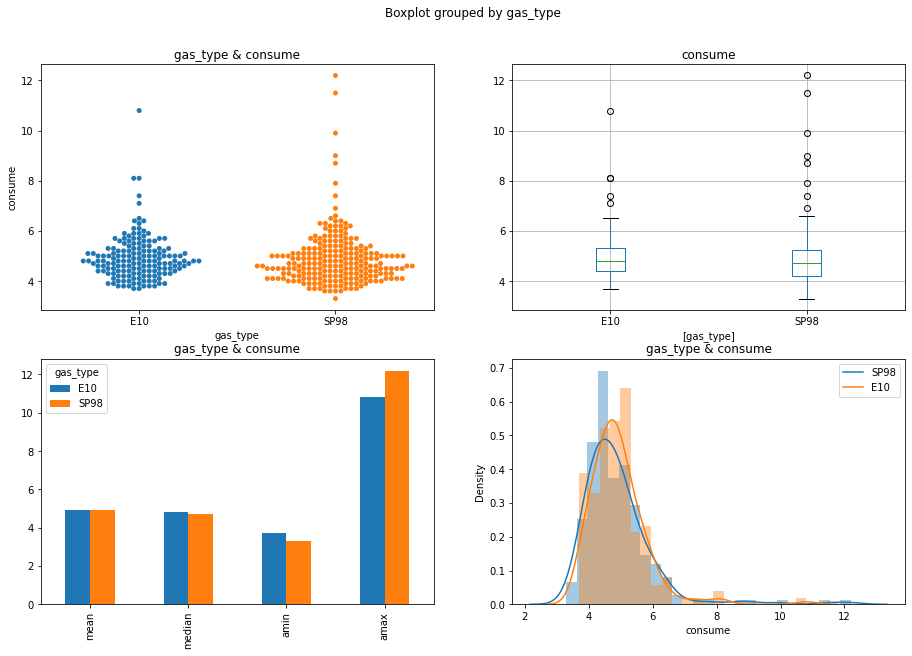

In [40]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.swarmplot(x=df['gas_type'],
              y=df['consume'],ax=ax1)
plt.title("gas_type & consume")

ax2=plt.subplot(2,2,2)
t=df[["consume","gas_type"]]
k2=t.boxplot(by="gas_type",ax=ax2)                                      

ax3=plt.subplot(2,2,3)
c=df.groupby("gas_type")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax3)
plt.title("gas_type & consume")

ax4=plt.subplot(2,2,4)
# t[t.gas_type=="SP98"].plot.kde(ax=ax4)
# t[t.gas_type=="E10"].plot.kde(ax=ax4)
sns.distplot(t[t.gas_type=="SP98"]["consume"],ax=ax4)
sns.distplot(t[t.gas_type=="E10"]["consume"],ax=ax4)
plt.legend(["SP98","E10"])
plt.title("gas_type & consume")

# Compare between ac and consume

When AC is on, car appears consume more.

/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AC             0          1
mean     4.88352   5.256667
median   4.70000   4.900000
amin     3.30000   4.000000
amax    11.50000  12.200000


/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'AC & consume')

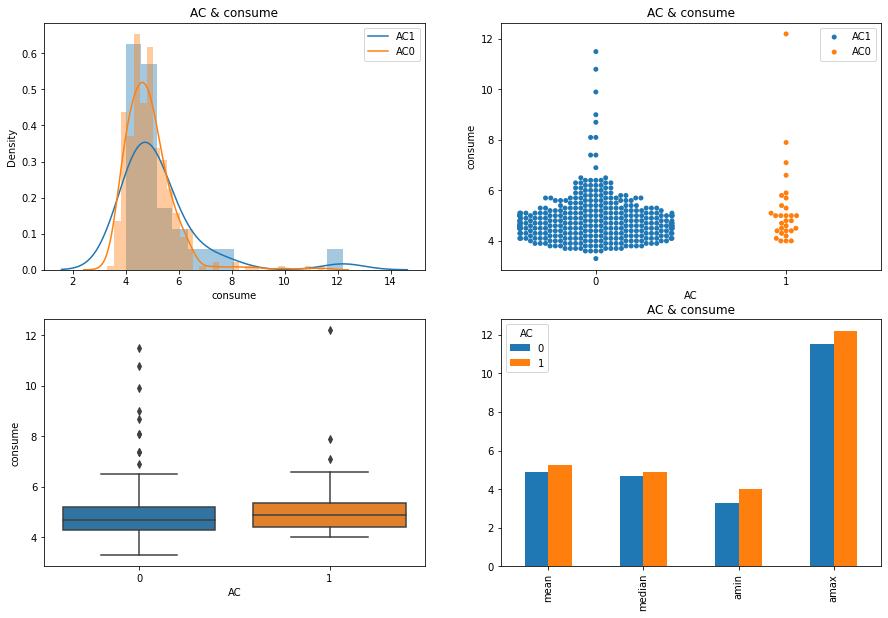

In [41]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[df.AC==1].consume,ax=ax1)
sns.distplot(df[df.AC==0].consume,ax=ax1)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=df.AC,y=df.consume,ax=ax2)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax3=plt.subplot(2,2,3)
sns.boxplot(x=df.AC,y=df.consume,ax=ax3)

ax4=plt.subplot(2,2,4)
c=df.groupby("AC")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax4)
plt.title("AC & consume")

When AC is on, the amount of E10 data is too limited, so it's hard to compare AC consumne between gas types.

When AC is on or off, E10 looks both consume more than SP98.
It's hard to see the sensiveness to AC between the two gas type.

/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

Text(0.5, 1.0, 'SP98: AC & consume')

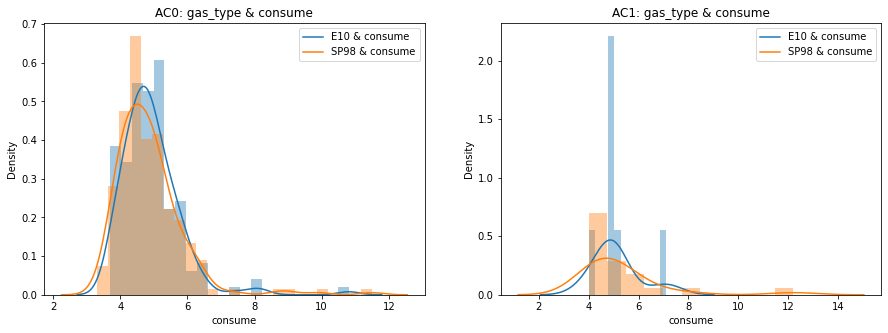

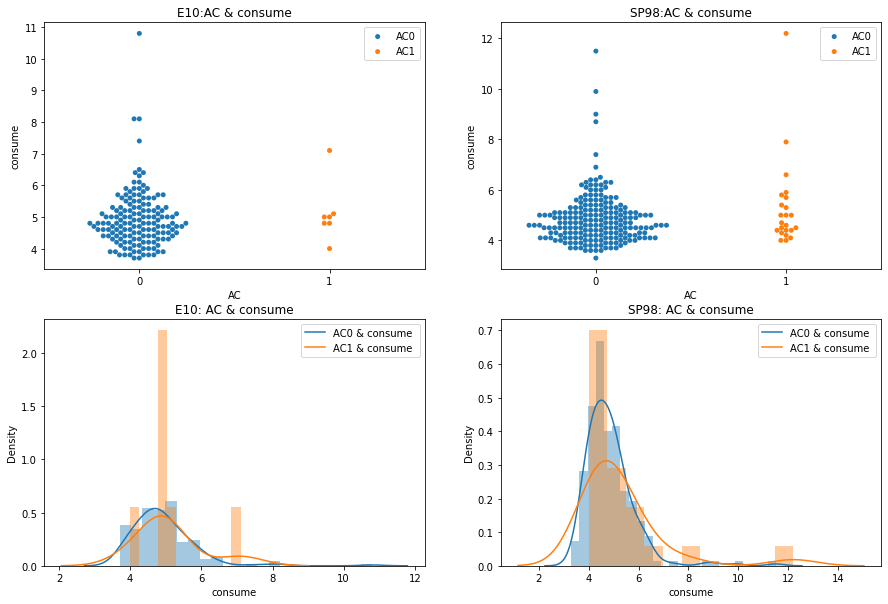

In [42]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.distplot(df[(df.AC==0)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.AC==0)&(df.gas_type=="SP98")].consume,ax=ax1)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("AC0: gas_type & consume")

ax2=plt.subplot(1,2,2)
sns.distplot(df[(df.AC==1)&(df.gas_type=="E10")].consume,ax=ax2)
sns.distplot(df[(df.AC==1)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("AC1: gas_type & consume")

plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.swarmplot(x=df[df.gas_type=="E10"].AC,y=df.consume,ax=ax1)
plt.legend(["AC0","AC1"])
plt.title("E10:AC & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=df[df.gas_type=="SP98"].AC,y=df.consume,ax=ax2)
plt.legend(["AC0","AC1"])
plt.title("SP98:AC & consume")

ax3=plt.subplot(2,2,3)
sns.distplot(df[(df.AC==0)&(df.gas_type=="E10")].consume,ax=ax3)
sns.distplot(df[(df.AC==1)&(df.gas_type=="E10")].consume,ax=ax3)
plt.legend(["AC0 & consume ","AC1 & consume"])
plt.title("E10: AC & consume")

ax4=plt.subplot(2,2,4)
sns.distplot(df[(df.AC==0)&(df.gas_type=="SP98")].consume,ax=ax4)
sns.distplot(df[(df.AC==1)&(df.gas_type=="SP98")].consume,ax=ax4)
plt.legend(["AC0 & consume ","AC1 & consume"])
plt.title("SP98: AC & consume")

# Compare between rain and consume

When it's rain, car obviously consume more.

/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'rain & consume')

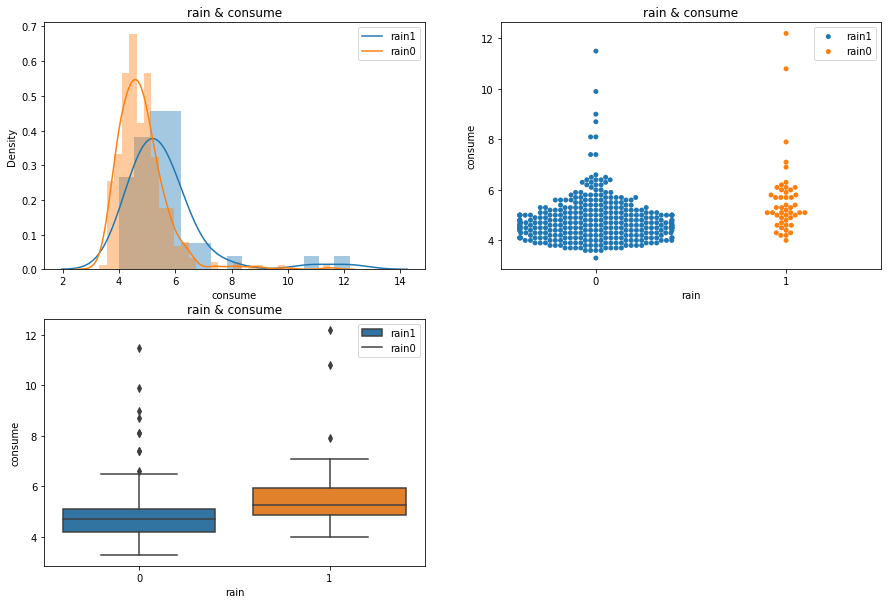

In [43]:
# rain
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[df.rain==1].consume,ax=ax1)
sns.distplot(df[df.rain==0].consume,ax=ax1)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=df.rain,y=df.consume,ax=ax2)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

ax3=plt.subplot(2,2,3)
sns.boxplot(x=df.rain,y=df.consume,ax=ax3)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

When it's rain, two type of gas:
- When rains, both type of gas looks consume more
- Whenever rain or not, E10 consume bit more than SP98.
- E10 seems more sensitive to rain as it have ethanol, that evaporate more in humidity


/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

Text(0.5, 1.0, 'E10:rain & consume')

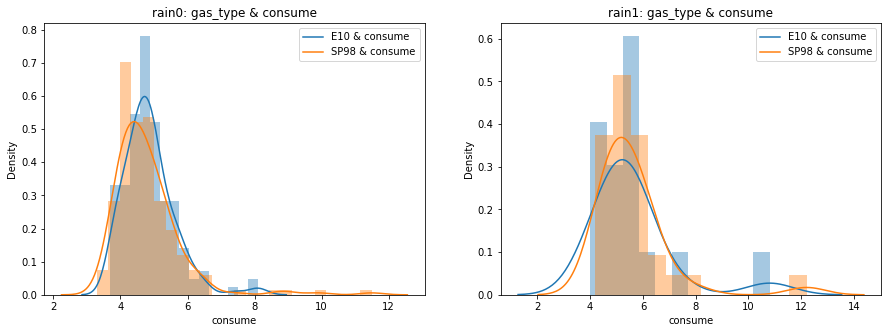

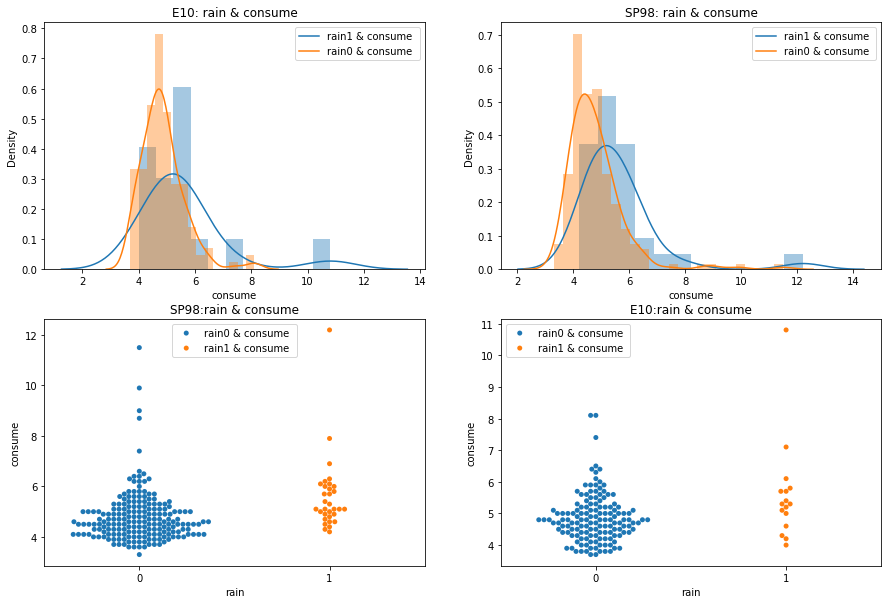

In [44]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.distplot(df[(df.rain==0)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.rain==0)&(df.gas_type=="SP98")].consume,ax=ax1)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("rain0: gas_type & consume")

ax2=plt.subplot(1,2,2)
sns.distplot(df[(df.rain==1)&(df.gas_type=="E10")].consume,ax=ax2)
sns.distplot(df[(df.rain==1)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["E10 & consume","SP98 & consume"])
plt.title("rain1: gas_type & consume")

plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[(df.rain==1)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.rain==0)&(df.gas_type=="E10")].consume,ax=ax1)
plt.legend(["rain1 & consume ","rain0 & consume"])
plt.title("E10: rain & consume")

ax2=plt.subplot(2,2,2)
sns.distplot(df[(df.rain==1)&(df.gas_type=="SP98")].consume,ax=ax2)
sns.distplot(df[(df.rain==0)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["rain1 & consume ","rain0 & consume"])
plt.title("SP98: rain & consume")


ax3=plt.subplot(2,2,3)
sns.swarmplot(x=df[df.gas_type=="SP98"].rain,y=df[df.gas_type=="SP98"].consume,ax=ax3)
plt.legend(["rain0 & consume ","rain1 & consume"])
plt.title("SP98:rain & consume")

ax4=plt.subplot(2,2,4)
sns.swarmplot(x=df[df.gas_type=="E10"].rain,y=df[df.gas_type=="E10"].consume,ax=ax4)
plt.legend(["rain0 & consume ","rain1 & consume"])
plt.title("E10:rain & consume")


# Compare between sun and consume
- When it's sunny, car obviously consume less and the data is more concentrated .

/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'sun & consume')

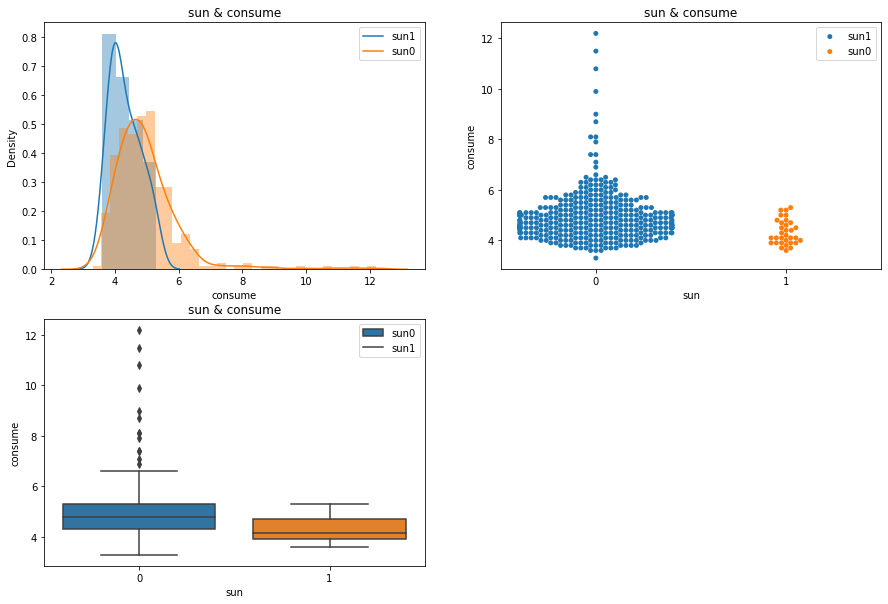

In [45]:
# sun
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[df.sun==1].consume,ax=ax1)
sns.distplot(df[df.sun==0].consume,ax=ax1)
plt.legend(["sun1","sun0"])
plt.title("sun & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=df.sun,y=df.consume,ax=ax2)
plt.legend(["sun1","sun0"])
plt.title("sun & consume")

ax3=plt.subplot(2,2,3)
sns.boxplot(x=df.sun,y=df.consume,ax=ax3)
plt.legend(["sun0","sun1"])
plt.title("sun & consume")


It performs the same in two different gas types

/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

Text(0.5, 1.0, 'E10:sun & consume')

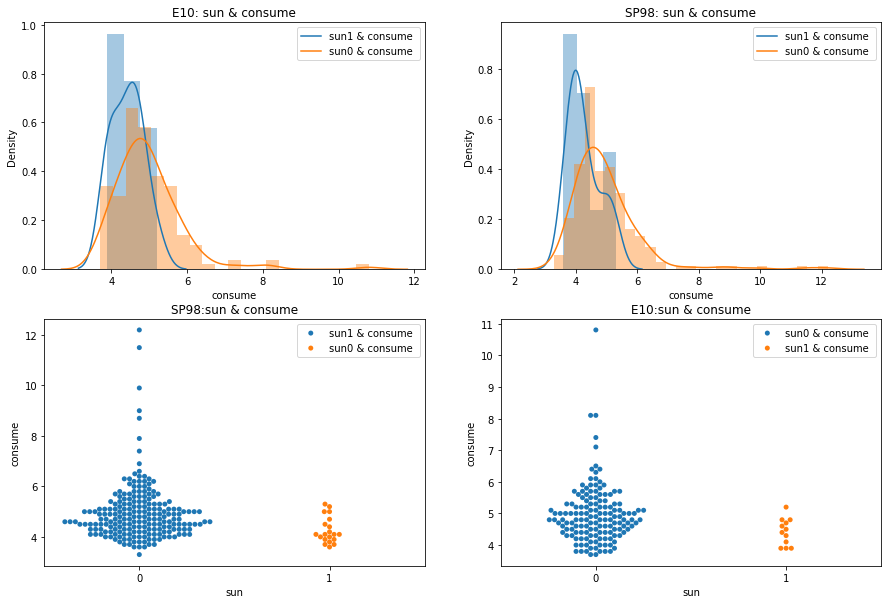

In [46]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[(df.sun==1)&(df.gas_type=="E10")].consume,ax=ax1)
sns.distplot(df[(df.sun==0)&(df.gas_type=="E10")].consume,ax=ax1)
plt.legend(["sun1 & consume ","sun0 & consume"])
plt.title("E10: sun & consume")

ax2=plt.subplot(2,2,2)
sns.distplot(df[(df.sun==1)&(df.gas_type=="SP98")].consume,ax=ax2)
sns.distplot(df[(df.sun==0)&(df.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["sun1 & consume ","sun0 & consume"])
plt.title("SP98: sun & consume")


ax3=plt.subplot(2,2,3)
sns.swarmplot(x=df[df.gas_type=="SP98"].sun,y=df[df.gas_type=="SP98"].consume,ax=ax3)
plt.legend(["sun1 & consume ","sun0 & consume"])
plt.title("SP98:sun & consume")

ax4=plt.subplot(2,2,4)
sns.swarmplot(x=df[df.gas_type=="E10"].sun,y=df[df.gas_type=="E10"].consume,ax=ax4)
plt.legend(["sun0 & consume ","sun1 & consume"])
plt.title("E10:sun & consume")

# Compare between distance and consume
- The car consume greatly when the distance is less than about 5km.
- And when the distance rise, the consume become rather stable.

Text(0.5, 1.0, 'distance & consume')

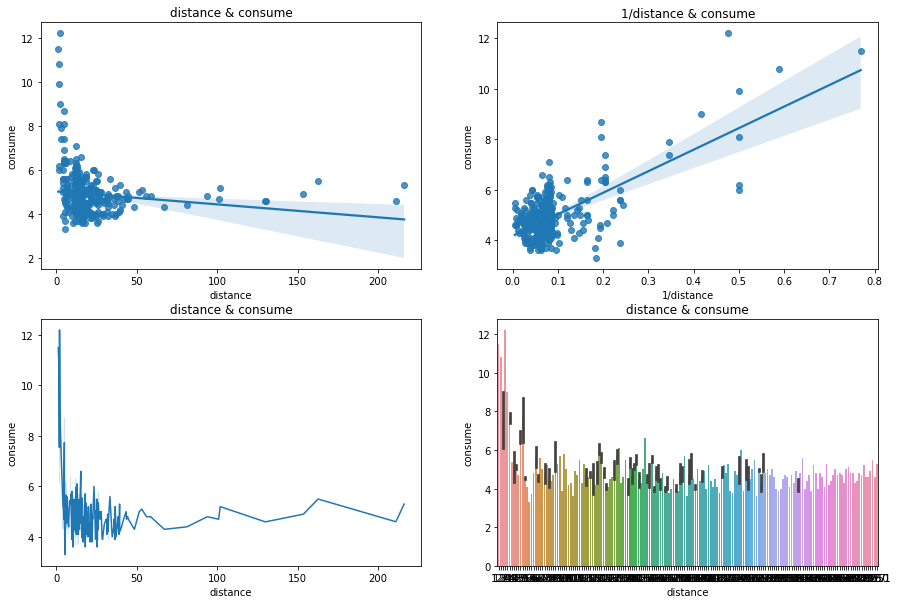

In [47]:
# distance&consume
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
# Linear regression scatterplot：
sns.regplot(x=df['distance'], y=df['consume'],ax=ax1)
plt.xlabel("distance")
plt.ylabel("consume")
plt.title("distance & consume")
ax2=plt.subplot(2,2,2)
sns.regplot(x=1/df['distance'], y=df['consume'],ax=ax2)
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.title("1/distance & consume")
ax3=plt.subplot(2,2,3)
sns.lineplot(x=df['distance'], y=df['consume'],ax=ax3)
plt.title("distance & consume")
ax4=plt.subplot(2,2,4)
sns.barplot(x=df['distance'], y=df['consume'],ax=ax4)
plt.title("distance & consume")

It performs the same in two different gas types.

Text(0.5, 1.0, '1/distance & consume')

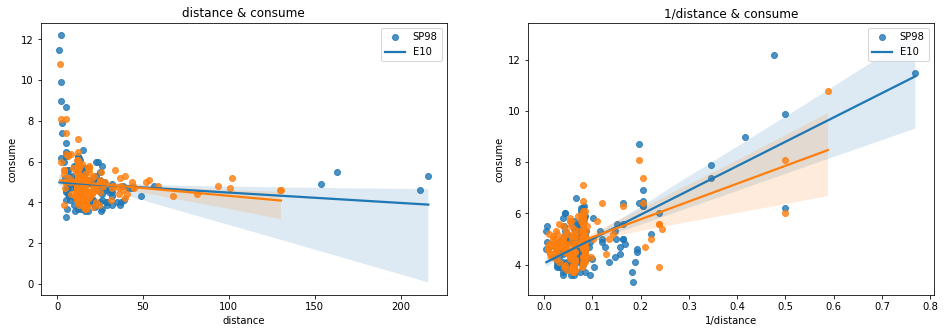

In [48]:
# distance&consume
plt.figure(figsize=(16,5))
ax1=plt.subplot(1,2,1)
# Inear regression scatterplot：
sns.regplot(x=df[df["gas_type"]=="SP98"]['distance'], y=df[df["gas_type"]=="SP98"]['consume'],ax=ax1)
sns.regplot(x=df[df["gas_type"]=="E10"]['distance'], y=df[df["gas_type"]=="E10"]['consume'],ax=ax1)
plt.legend(["SP98","E10"])
plt.xlabel("distance")
plt.ylabel("consume")
plt.title("distance & consume")

ax2=plt.subplot(1,2,2)
sns.regplot(x=1/df[df["gas_type"]=="SP98"]['distance'], y=df[df["gas_type"]=="SP98"]['consume'],ax=ax2)
sns.regplot(x=1/df[df["gas_type"]=="E10"]['distance'], y=df[df["gas_type"]=="E10"]['consume'],ax=ax2)
plt.legend(["SP98","E10"])
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.title("1/distance & consume")

Compare between speed and consume
- The car consume greatly when the speed is less than about 20km/h.
- And when the speed rise, the consume become rather stable.

Text(0.5, 1.0, 'speed & consume')

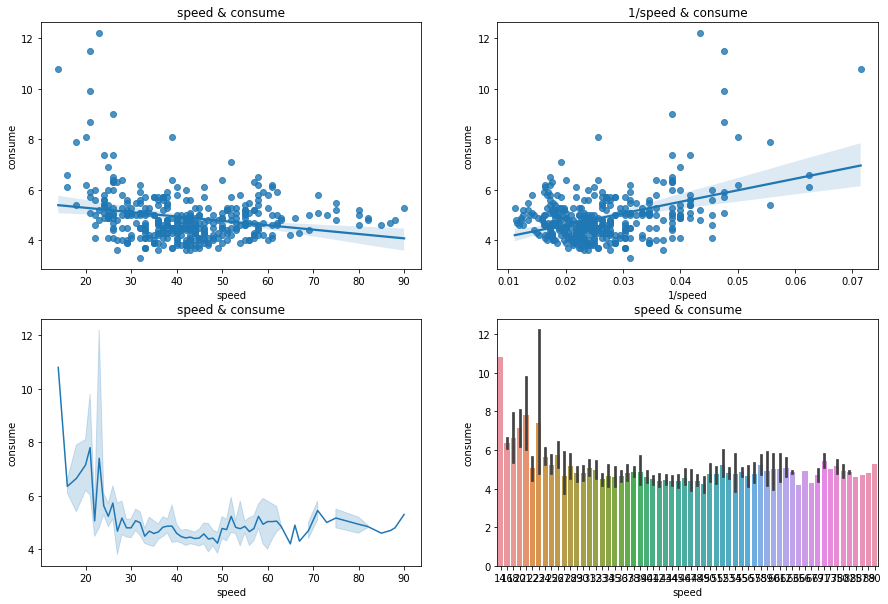

In [49]:
# speed&consume
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)

sns.regplot(x=df['speed'], y=df['consume'],ax=ax1)
plt.xlabel("speed")
plt.ylabel("consume")
plt.title("speed & consume")
ax2=plt.subplot(2,2,2)
sns.regplot(x=1/df['speed'], y=df['consume'],ax=ax2)
plt.xlabel("1/speed")
plt.ylabel("consume")
plt.title("1/speed & consume")
ax3=plt.subplot(2,2,3)
sns.lineplot(x=df['speed'], y=df['consume'],ax=ax3)
plt.title("speed & consume")
ax4=plt.subplot(2,2,4)
sns.barplot(x=df['speed'], y=df['consume'],ax=ax4)
plt.title("speed & consume")

It performs the same in two different gas types.

Text(0.5, 1.0, 'speed & consume')

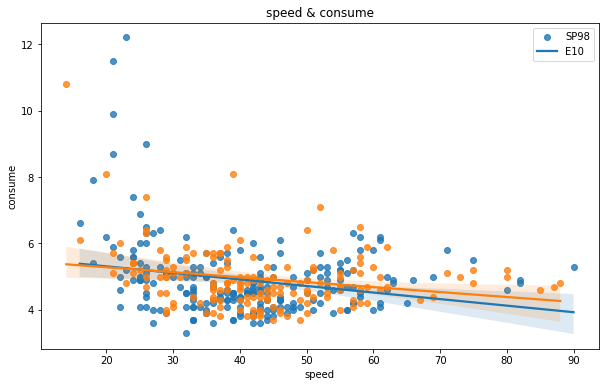

In [50]:
# speed&consume
plt.figure(figsize=(10,6))
# linear regression scatterplot：
sns.regplot(x=df[df["gas_type"]=="SP98"]['speed'], y=df[df["gas_type"]=="SP98"]['consume'])
sns.regplot(x=df[df["gas_type"]=="E10"]['speed'], y=df[df["gas_type"]=="E10"]['consume'])
plt.legend(["SP98","E10"])
plt.xlabel("speed")
plt.ylabel("consume")
plt.title("speed & consume")

# Compare between Temp_outside and consume
- The car consume more when the Temp_outside is low.

Text(0.5, 1.0, 'temp_outside & consume')

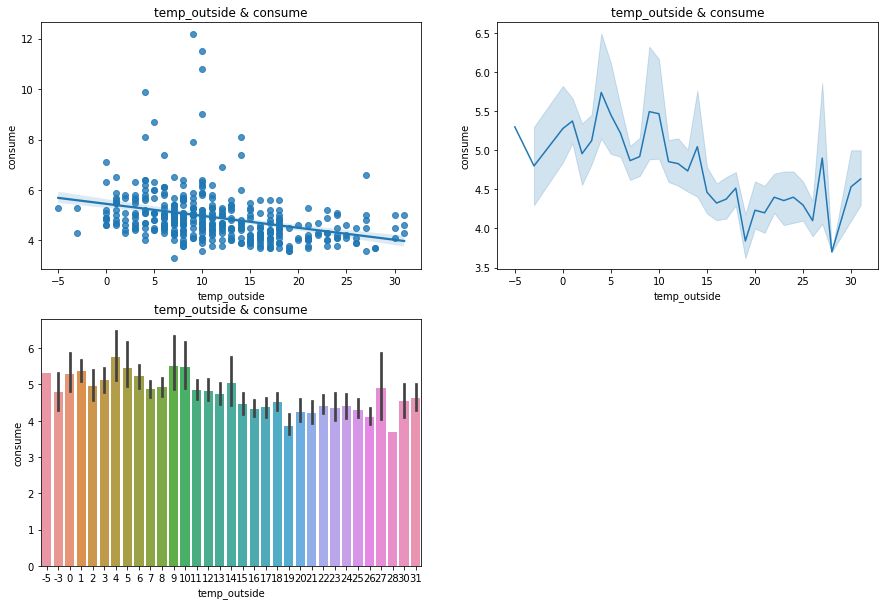

In [51]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)

sns.regplot(x=df['temp_outside'], y=df['consume'],ax=ax1)
plt.xlabel("temp_outside")
plt.ylabel("consume")
plt.title("temp_outside & consume")
ax2=plt.subplot(2,2,2)
sns.lineplot(x=df['temp_outside'], y=df['consume'],ax=ax2)
plt.title("temp_outside & consume")
ax3=plt.subplot(2,2,3)
sns.barplot(x=df['temp_outside'], y=df['consume'],ax=ax3)
plt.title("temp_outside & consume")


## It performs the same in two different gas types
- Both type of gas consume more when the Temp_outside is low.
- The difference is: E10 rise totally as a whole, while SP98 rise randomly. So E10 may be more sensitive to temperature for the presense of ethanol, there in low temperature, E10 consume little bit less

/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

Text(0.5, 1.0, 'E10:temp_outside & consume')

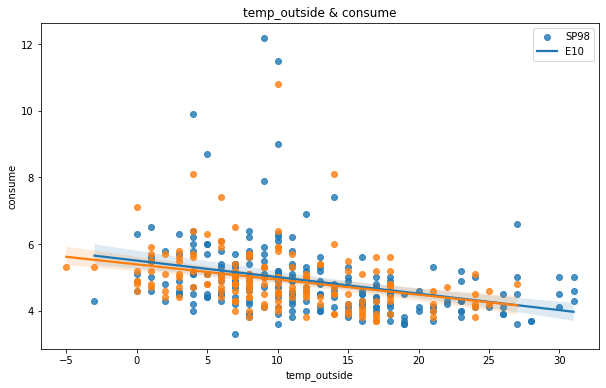

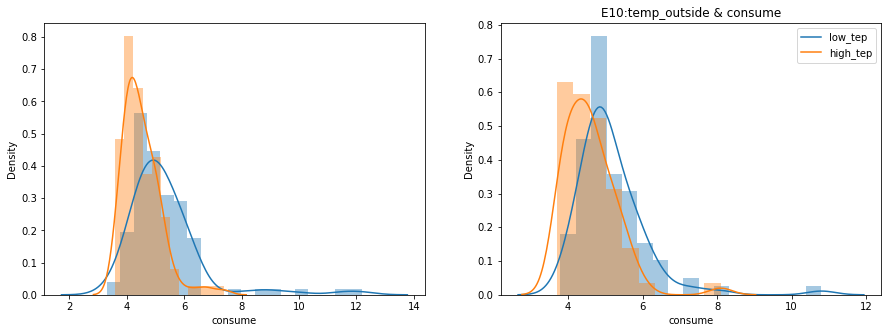

In [52]:
# temp&consume
plt.figure(figsize=(10,6))
# linear regression scatterplot：
sns.regplot(x=df[df["gas_type"]=="SP98"]['temp_outside'], y=df[df["gas_type"]=="SP98"]['consume'])
sns.regplot(x=df[df["gas_type"]=="E10"]['temp_outside'], y=df[df["gas_type"]=="E10"]['consume'])
plt.legend(["SP98","E10"])
plt.xlabel("temp_outside")
plt.ylabel("consume")
plt.title("temp_outside & consume")

plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
sns.distplot(df[(df["temp_outside"]<=10)&(df["gas_type"]=="SP98")]['consume'],ax=ax1)
sns.distplot(df[(df["temp_outside"]>10)&(df["gas_type"]=="SP98")]['consume'],ax=ax1)
plt.legend(["low_tep","high_tep"])
plt.title("SP98:temp_outside & consume")

sns.distplot(df[(df["temp_outside"]<=10)&(df["gas_type"]=="E10")]['consume'],ax=ax2)
sns.distplot(df[(df["temp_outside"]>10)&(df["gas_type"]=="E10")]['consume'],ax=ax2)
plt.legend(["low_tep","high_tep"])
plt.title("E10:temp_outside & consume")

# AB Test

In [53]:
print(df.columns)

import statsmodels.api as sm
formula ="consume ~ gas_type+distance+rain+speed+temp_outside+AC+temp_inside"
model = sm.formula.ols(formula, data=df).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')
                  sum_sq     df          F        PR(>F)
gas_type        0.115556    1.0   0.133762  7.147669e-01
distance        0.522835    1.0   0.605206  4.370826e-01
rain           10.305522    1.0  11.929137  6.149008e-04
speed          16.407778    1.0  18.992791  1.690927e-05
temp_outside   25.726622    1.0  29.779801  8.747675e-08
AC              4.928816    1.0   5.705341  1.740074e-02
temp_inside     2.051382    1.0   2.374573  1.241576e-01
Residual      328.280110  380.0        NaN           NaN


 Result: According the limited data:
- rain, speed,temp_outside and AC have strong relation to the consume amount
- while gas_type, distance and temp_inside can't be proved significant enough

In [54]:
formula ="consume ~ gas_type+rain+speed+temp_outside+AC+gas_type:rain+gas_type:speed+gas_type:temp_outside+gas_type:AC"
model = sm.formula.ols(formula, data=df).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                           sum_sq     df          F        PR(>F)
gas_type                 0.067842    1.0   0.077886  7.803362e-01
rain                    10.794755    1.0  12.392845  4.835772e-04
gas_type:rain            0.208824    1.0   0.239739  6.246789e-01
speed                   19.185953    1.0  22.026302  3.766247e-06
gas_type:speed           0.586072    1.0   0.672835  4.125817e-01
temp_outside            33.914651    1.0  38.935484  1.175543e-09
gas_type:temp_outside    0.255632    1.0   0.293477  5.883202e-01
AC                       3.363391    1.0   3.861318  5.014346e-02
gas_type:AC              0.818210    1.0   0.939340  3.330673e-01
Residual               329.255908  378.0        NaN           NaN


In [55]:
formula ="consume ~ temp_outside+AC+temp_outside:AC"
model = sm.formula.ols(formula, data=df).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                     sum_sq     df          F        PR(>F)
temp_outside      48.269484    1.0  51.356895  3.970514e-12
AC                 9.607589    1.0  10.222109  1.502684e-03
temp_outside:AC    0.061788    1.0   0.065740  7.977810e-01
Residual         360.915160  384.0        NaN           NaN


## AB Test 1：If E10 consume more and which is cheaper?
- 1.HYPOTHESIS: H0: E10 consume = SP98 consume; H1: E10 consume > SP98 consume
- 2.METHOD: Z test & mannwhitney U TEST
- 3.INFO: E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

In [56]:
aa=df[df["gas_type"]=="E10"].consume
bb=df[df["gas_type"]=="SP98"].consume
print(stats.levene(aa,bb))
print(stats.shapiro(aa))
print(stats.shapiro(bb))
print(len(aa),len(bb))
# As too much outliers exist, the shapiro test failed,mannwhitneyu is considered.

# Z test
print(sw.ztest(aa,bb,alternative="larger"))
# P_value:0.3816452423051032 is larger than 0.05,H1 is not supported.
print(sw.ztest(aa*1.38,bb*1.46,alternative="smaller"))
# # P_value:0.01160724138852348 is less than 0.05,E10 cost less.
# There is not enough evidence to confirm E10 consume more, but it indeed cheaper than SP98.

LeveneResult(statistic=1.4896619839606222, pvalue=0.2230139845200356)
ShapiroResult(statistic=0.8245292901992798, pvalue=1.4005722579965574e-12)
ShapiroResult(statistic=0.7505878210067749, pvalue=2.7849982152529897e-18)
160 228
(0.3011626300254617, 0.3816452423051032)
(-2.2698862964016047, 0.01160724138852348)


In [57]:
print(stats.mannwhitneyu(aa,bb,alternative='greater'))
# P_value:0.10223258848089473 is larger than 0.05,H1 is also not supported.
print(stats.mannwhitneyu(aa*1.38,bb*1.46,alternative='less'))
# # P_value:0.014203982470039032 is less than 0.05,E10 cost less.
# There is not enough evidence to confirm E10 consume more, but it indeed cheaper than SP98.

MannwhitneyuResult(statistic=19619.0, pvalue=0.10223258848089473)
MannwhitneyuResult(statistic=15857.0, pvalue=0.014203982470039051)


### Result of AB test1:
- There is not enough evidence to confirm E10 consume more, but it indeed cheaper than SP98.

/Users/rodrigofranco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='consume', ylabel='Density'>

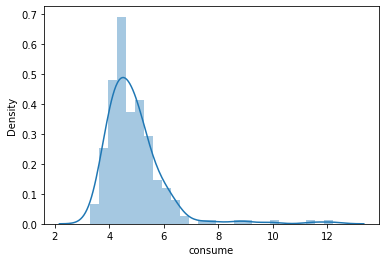

In [58]:
# sns.distplot(df[df["gas_type"]=="E10"].consume)
sns.distplot(df[df["gas_type"]=="SP98"].consume)

## AB Test 2：If E10 consume more and which is cheaper? (AC off & no rain)
- 1.HYPOTHESIS: H0: E10 consume = SP98 consume; H1: E10 consume > SP98 consume
- 2.METHOD: Z test & mannwhitney U TEST
- 3.INFO: E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

In [59]:
# Z test
import statsmodels.stats.weightstats as sw
from scipy import stats
aa=df[(df["gas_type"]=="E10")&(df["rain"]==0)&(df["AC"]==0)].consume
bb=df[(df["gas_type"]=="SP98")&(df["rain"]==0)&(df["AC"]==0)].consume
print(stats.levene(aa,bb))
print(stats.shapiro(aa))
print(stats.shapiro(bb))
print(len(aa),len(bb))
print(sw.ztest(aa,bb,alternative="larger"))
# # P_value:0.293928190049461 is larger than 0.05,H1 not supported.
print(sw.ztest(aa*1.38,bb*1.46,alternative="smaller"))
# # P_value:0.0.0210404338353549 is less than 0.05,E10 cost less.
# There is not enough evidence to confirm E10 consume more, but it indeed cheaper than SP98.

LeveneResult(statistic=1.7851002052801064, pvalue=0.1824736399084924)
ShapiroResult(statistic=0.9052594900131226, pvalue=5.672025693570504e-08)
ShapiroResult(statistic=0.7657719254493713, pvalue=1.0375481271463296e-15)
141 181
(0.5419450222251538, 0.293928190049461)
(-2.0327195235687534, 0.02104043383535498)


In [60]:
import scipy.stats as stats
print(stats.mannwhitneyu(aa,bb,alternative='greater'))
# P_value:0.05382597169217481 is larger than 0.05,H1 is also not supported,but it's really close.
print(stats.mannwhitneyu(aa*1.38,bb*1.46,alternative='less'))
# # P_value:0.04706120597375165 is less than 0.05,E10 cost less.
# There is not enough evidence to confirm E10 consume more, but it seems cheaper than SP98.

MannwhitneyuResult(statistic=14093.0, pvalue=0.05382597169217481)
MannwhitneyuResult(statistic=11373.0, pvalue=0.04706120597375168)


### Result of AB test2:
- When there is no rain & AC off, although still not enough evidence to confirm E10 consume more(alpha=0.05), but pvalue=0.05382597169217481 is really closer.

- It means when there is no rain & AC off, E10 seems consume more than rain & AC on.

## AB Test 3：If E10 consume more and which is cheaper? (AC on or rain)
- 1.HYPOTHESIS: H0: E10 consume = SP98 consume; H1: E10 consume > SP98 consume
- 2.METHOD: Z test & mannwhitney U TEST
- 3.INFO: E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

In [61]:
import statsmodels.stats.weightstats as sw
aa=df[(df["gas_type"]=="E10")&(df["rain"]==1)|(df["AC"]==1)].consume
bb=df[(df["gas_type"]=="SP98")&(df["rain"]==1)|(df["AC"]==1)].consume
print(stats.levene(aa,bb))
print(stats.shapiro(aa))
print(stats.shapiro(bb))
print(len(aa),len(bb))
print(sw.ztest(aa,bb,alternative="larger"))
# P_value:0.3374893379710775 is larger than 0.05,H1 is not supported.
print(sw.ztest(aa*1.38,bb*1.46,alternative="smaller"))
# # P_value:0.275745163685134 is larger than 0.05,E10 cost less is not supported.
# There is not enough evidence to confirm E10 consume more, or cheaper than SP98.

LeveneResult(statistic=0.5335437043567341, pvalue=0.4669374387827743)
ShapiroResult(statistic=0.6801451444625854, pvalue=2.749444405480972e-08)
ShapiroResult(statistic=0.7023963332176208, pvalue=3.6614886678165703e-09)
42 54
(0.41932493462601317, 0.3374893379710775)
(-0.5955283906645311, 0.2757451636851349)


In [62]:
#mannwhitneyu
import scipy.stats as stats
print(stats.mannwhitneyu(aa,bb,alternative='greater'))
# P_value:0.5280197981549617 is larger than 0.05,H1 is also not supported.
print(stats.mannwhitneyu(aa*1.38,bb*1.46,alternative='less'))
# # P_value:0.5280197981549612 is larger than 0.05,H1 is far not supported.
# There is not enough evidence to confirm E10 consume more, or cheaper than SP98.


MannwhitneyuResult(statistic=1125.0, pvalue=0.5280197981549617)
MannwhitneyuResult(statistic=921.0, pvalue=0.05817401984178461)


### Result of AB test3:
- When there is rain or AC on, there is not enough evidence to confirm E10 consume more (alpha=0.05), or E10 cheaper.


## AB Test 4：E10 consume less in LOW TEMP? Which is cheaper? (Low_tep)
- 1.HYPOTHESIS: H0: E10 consume = SP98 consume; H1: E10 consume < SP98 consume
- 2.METHOD: Z test & mannwhitney U TEST
- 3.INFO: E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.



In [63]:
aa=df[(df["gas_type"]=="E10")&(df["temp_outside"]<=10)].consume
bb=df[(df["gas_type"]=="SP98")&(df["temp_outside"]<=10)].consume
print(stats.levene(aa,bb))
print(stats.shapiro(aa))
print(stats.shapiro(bb))
print(len(aa),len(bb))
print(sw.ztest(aa,bb,alternative="smaller"))
# P_value:0.17827745162401448 is larger than 0.05,H1 is not supported.
print(sw.ztest(aa*1.38,bb*1.46,alternative="smaller"))
# # P_value:0.00365980803442083 is less than 0.05,E10 cost less in low tep.

# Although not enough evidence to prove E10 consume less in low tmp, it indeed cheaper.

LeveneResult(statistic=2.4628873753283598, pvalue=0.11812172937331884)
ShapiroResult(statistic=0.7858898043632507, pvalue=1.9322790589804129e-10)
ShapiroResult(statistic=0.7380416393280029, pvalue=1.0123638038983529e-12)
95 110
(-0.9219495275668105, 0.17827745162401448)
(-2.681941946555591, 0.003659808034420835)


In [64]:
#mannwhitneyu
import scipy.stats as stats
print(stats.mannwhitneyu(aa,bb,alternative='less'))
# P_value:0.5280197981549617 is larger than 0.05,H1 is also not supported.
print(stats.mannwhitneyu(aa*1.38,bb*1.46,alternative='less'))
# # P_value:0.0013151097360611266 is less than 0.05,H1 is far not supported.
# Although not enough evidence to prove E10 consume less in low tmp, it indeed cheaper.

MannwhitneyuResult(statistic=5026.0, pvalue=0.31947570292177974)
MannwhitneyuResult(statistic=3951.0, pvalue=0.0013151097360611266)


## AB Test 5：E10 consume more in HIGH TEMP? Which is cheaper? (High_tep)
- 1.HYPOTHESIS: H0: E10 consume = SP98 consume; H1: E10 consume > SP98 consume
- 2.METHOD: Z test & mannwhitney U TEST
- 3.INFO: E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

In [65]:
import statsmodels.stats.weightstats as sw
from scipy import stats
aa=df[(df["gas_type"]=="E10")&(df["temp_outside"]>10)].consume
bb=df[(df["gas_type"]=="SP98")&(df["temp_outside"]>10)].consume
print(stats.levene(aa,bb))
print(stats.shapiro(aa))
print(stats.shapiro(bb))
print(len(aa),len(bb))
print(sw.ztest(aa,bb,alternative="larger"))
# P_value:0.21642141760382266 is larger than 0.05,H1 is not supported.
print(sw.ztest(aa*1.38,bb*1.46,alternative="smaller"))
# # P_value:0.05000288303158573. 

# IN high temp,E10 looks consume more but evidence not enough.

LeveneResult(statistic=0.14778700712095977, pvalue=0.7011104909838356)
ShapiroResult(statistic=0.8552901148796082, pvalue=2.056048515441944e-06)
ShapiroResult(statistic=0.8875131607055664, pvalue=5.802768399121305e-08)
65 118
(0.7843362484682266, 0.21642141760382266)
(-1.6448256738084377, 0.05000288303158573)


In [66]:
#mannwhitneyu
import scipy.stats as stats
print(stats.mannwhitneyu(aa,bb,alternative='greater'))
# P_value:0.5280197981549617 is larger than 0.05,H1 is also not supported.
print(stats.mannwhitneyu(aa*1.38,bb*1.46,alternative='less'))
# # P_value:0.0013151097360611266 is less than 0.05,H1 is far not supported.
# Although not enough evidence to prove E10 consume less in low tmp, it indeed cheaper.

MannwhitneyuResult(statistic=4119.5, pvalue=0.20339186917266328)
MannwhitneyuResult(statistic=3140.0, pvalue=0.021350567567325725)


# Use bootstrap to magnify the difference between gas types

gas_type       E10      SP98
0         4.831008  4.789119
1         4.860839  4.900559
2         4.830921  4.757059
3         4.877551  4.780571
4         4.863380  4.745556
gas_type       E10      SP98
0         6.666791  6.992114
1         6.707958  7.154816
2         6.666671  6.945306
3         6.731020  6.979634
4         6.711465  6.928511
When no rain & AC off, E10 consume 1.24% more than SP98.
The rate that E10 consume higher is 72.45%.
When no rain & AC off, E10 cost 4.3% less than SP98.
The rate that SP98 cost higher is 98.8%.


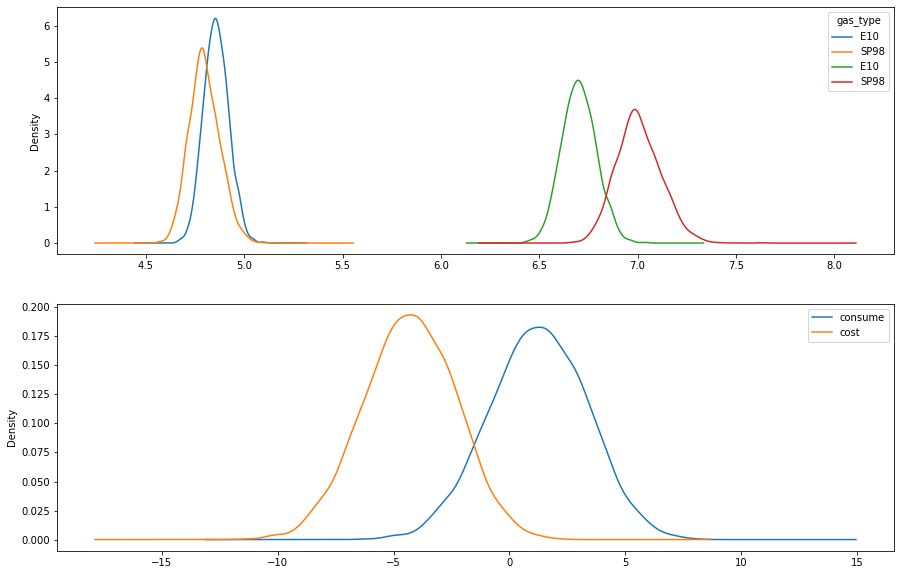

In [67]:
boot_1d = []
d=df[(df.rain==0)&(df.AC==0)]
for i in range(2000):
    boot_mean = d.sample(frac=1,replace=True).groupby("gas_type")["consume"].mean()
    boot_1d.append(boot_mean)

# Transforming the list to a DataFrame
boot_1d =pd.DataFrame(boot_1d)
boot_1d.reset_index(drop=True,inplace=True)

print(boot_1d.head())
price=[1.38,1.46]
boot_2d=boot_1d*price
print(boot_2d.head())

# A Kernel Density Estimate plot of the bootstrap distributions
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,1,1)
boot_1d.plot.kde(ax=ax1)
boot_2d.plot.kde(ax=ax1)

# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d["E10"]-boot_1d["SP98"])*100/boot_1d["SP98"]
boot_2d['diff'] = (boot_2d["E10"]-boot_2d["SP98"])*100/boot_2d["SP98"]

# Ploting the bootstrap % difference
ax2=plt.subplot(2,1,2)
boot_1d['diff'].plot.kde(ax=ax2)
boot_2d['diff'].plot.kde(ax=ax2)
c1=round(boot_1d['diff'].mean(),2)
c2=-round(boot_2d['diff'].mean(),2)
plt.legend(["consume","cost"])

# boot_1d['diff'].head(10)
# boot_2d['diff'].head(10)

prob1 = (boot_1d['diff']>0).mean()*100
prob2 = (boot_2d['diff']<0).mean()*100

print("When no rain & AC off, E10 consume %s%% more than SP98." %c1)
print("The rate that E10 consume higher is %s%%." %prob1)

print("When no rain & AC off, E10 cost %s%% less than SP98." %c2)
print("The rate that SP98 cost higher is %s%%." %prob2)

# Conclusions

According to the this data, there is not enough evidence to confirm E10 consumes more, but it indeed cheaper than SP98.

**Rain/AC:**
When it rains or AC is on, both types consume more.
Although still not enough evidence to confirm E10 consumes more in both situations when there is no rain & AC is off, the hypothesis is more significant. (E10 consumes more than SP98)
E10 is still cheaper than SP98 in both situations.

**DISTANCE:**
The car consumes greatly when the distance is less than about 5km.
And when the distance rises, consumption becomes rather stable.

**SPEED:**
The car consumes greatly when the speed is less than about 20km/h.
And when the speed rises, the consumption becomes rather stable.

**Temp_outside:**
The car consumes more when the Temp_outside is low.
Not enough evidence to prove the differential sensitivity to temp between gas types.






<b>**THANK YOU VERY MUCH FOR THIS CHANCE, IS WAS A PLESURE TO HAVE YOU AS A CUSTOMER**<b/> 